In [ ]:
import cv2
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
import os
import glob

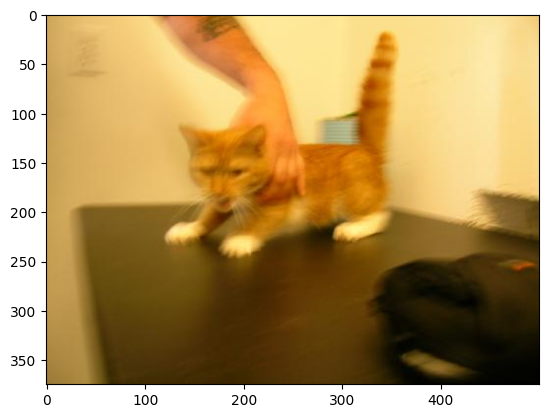

In [ ]:
ran_img = cv2.imread('/content/drive/MyDrive/CV Exp 6/train/CAT/0.jpg')
ran_img = cv2.cvtColor(ran_img, cv2.COLOR_BGR2RGB)
plt.imshow(ran_img)

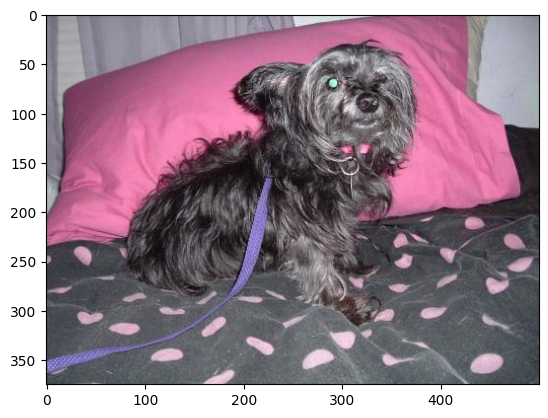

In [ ]:
ran_img = cv2.imread('/content/drive/MyDrive/CV Exp 6/train/DOG/0.jpg')
ran_img = cv2.cvtColor(ran_img, cv2.COLOR_BGR2RGB)
plt.imshow(ran_img)

In [ ]:
train_dog_path = '/content/drive/MyDrive/CV Exp 6/train/DOG'
train_cat_path = '/content/drive/MyDrive/CV Exp 6/train/CAT'

test_dog_path = '/content/drive/MyDrive/CV Exp 6/test/DOG'
test_cat_path = '/content/drive/MyDrive/CV Exp 6/test/CAT'

In [ ]:
dog_train_img = glob.glob(os.path.join(train_dog_path, '*.jpg'))
cat_train_img = glob.glob(os.path.join(train_cat_path, '*.jpg'))

dog_test_img = glob.glob(os.path.join(test_dog_path, '*.jpg'))
cat_test_img = glob.glob(os.path.join(test_cat_path, '*.jpg'))

In [ ]:
print(len(dog_train_img))
print(len(cat_train_img))
print(len(dog_test_img))
print(len(cat_test_img))

9372
9371
3125
3126


In [ ]:
from keras.preprocessing.image import ImageDataGenerator

image_gen = ImageDataGenerator(rotation_range=30,
                               width_shift_range=0.1,
                               height_shift_range=0.1,
                               rescale=1/255,
                               shear_range=0.2,
                               zoom_range=0.2,
                               horizontal_flip=True,
                               fill_mode='nearest')

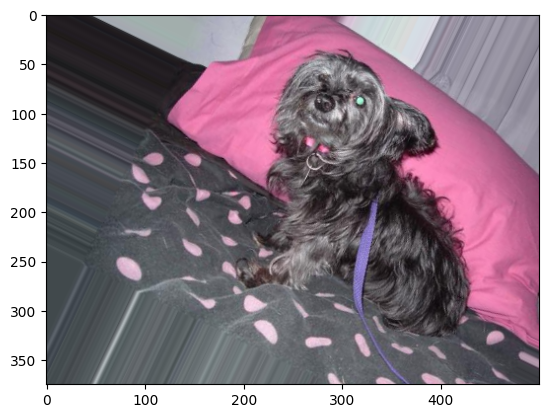

In [ ]:
plt.imshow(image_gen.random_transform(ran_img))

In [ ]:
image_gen.flow_from_directory('/content/drive/MyDrive/CV Exp 6/train')

Found 18743 images belonging to 2 classes.


In [ ]:
image_gen.flow_from_directory('/content/drive/MyDrive/CV Exp 6/test')

Found 6251 images belonging to 2 classes.


In [ ]:
image_shape = (150, 150, 3)

In [ ]:
from keras.models import Sequential
from keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D

In [ ]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3, 3), input_shape=image_shape, activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(Dense(128))

model.add(Dropout(0.5))

model.add(Dense(1))

model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 74, 74, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 72, 72, 32)        9248      
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 36, 36, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_8 (Conv2D)           (None, 34, 34, 32)        9248      
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 17, 17, 32)       

In [ ]:
batch_size = 16
train_img_gen = image_gen.flow_from_directory('/content/drive/MyDrive/CV Exp 6/train',
                                              target_size=image_shape[:2],
                                              batch_size=batch_size,
                                              class_mode='binary')

test_img_gen = image_gen.flow_from_directory('/content/drive/MyDrive/CV Exp 6/test',
                                              target_size=image_shape[:2],
                                              batch_size=batch_size,
                                              class_mode='binary')

Found 18743 images belonging to 2 classes.
Found 6251 images belonging to 2 classes.


In [ ]:
results = model.fit_generator(train_img_gen, epochs = 10, validation_data=test_img_gen)

Epoch 1/10


<ipython-input-47-e55b905fb317>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  results = model.fit_generator(train_img_gen, epochs = 10, validation_data=test_img_gen)


1172/1172 [==============================] - 693s 591ms/step - loss: 0.4238 - accuracy: 0.8061 - val_loss: 0.4203 - val_accuracy: 0.8072
Epoch 2/10
1172/1172 [==============================] - 719s 613ms/step - loss: 0.4214 - accuracy: 0.8099 - val_loss: 0.4187 - val_accuracy: 0.8098
Epoch 3/10
1172/1172 [==============================] - 720s 614ms/step - loss: 0.4099 - accuracy: 0.8139 - val_loss: 0.4255 - val_accuracy: 0.8074
Epoch 4/10
1172/1172 [==============================] - 717s 612ms/step - loss: 0.4088 - accuracy: 0.8172 - val_loss: 0.4513 - val_accuracy: 0.7837
Epoch 5/10
1172/1172 [==============================] - 719s 613ms/step - loss: 0.3989 - accuracy: 0.8211 - val_loss: 0.4051 - val_accuracy: 0.8179
Epoch 6/10
1172/1172 [==============================] - 662s 565ms/step - loss: 0.3961 - accuracy: 0.8231 - val_loss: 0.3825 - val_accuracy: 0.8309
Epoch 7/10
1172/1172 [==============================] - 649s 553ms/step - loss: 0.3846 - accuracy: 0.8316 - val_loss: 0.414